In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import pandas as pd
#библиотека для числовых вычислений
import numpy as np
# Импортируем модуль для создания легенды вручную
import matplotlib.patches as mpatches
#для построения графиков
import matplotlib.pyplot as plt
#Для красивой визуализации данных на основе Matplotlib
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv("/kaggle/input/titanic/Titanic.csv")

In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


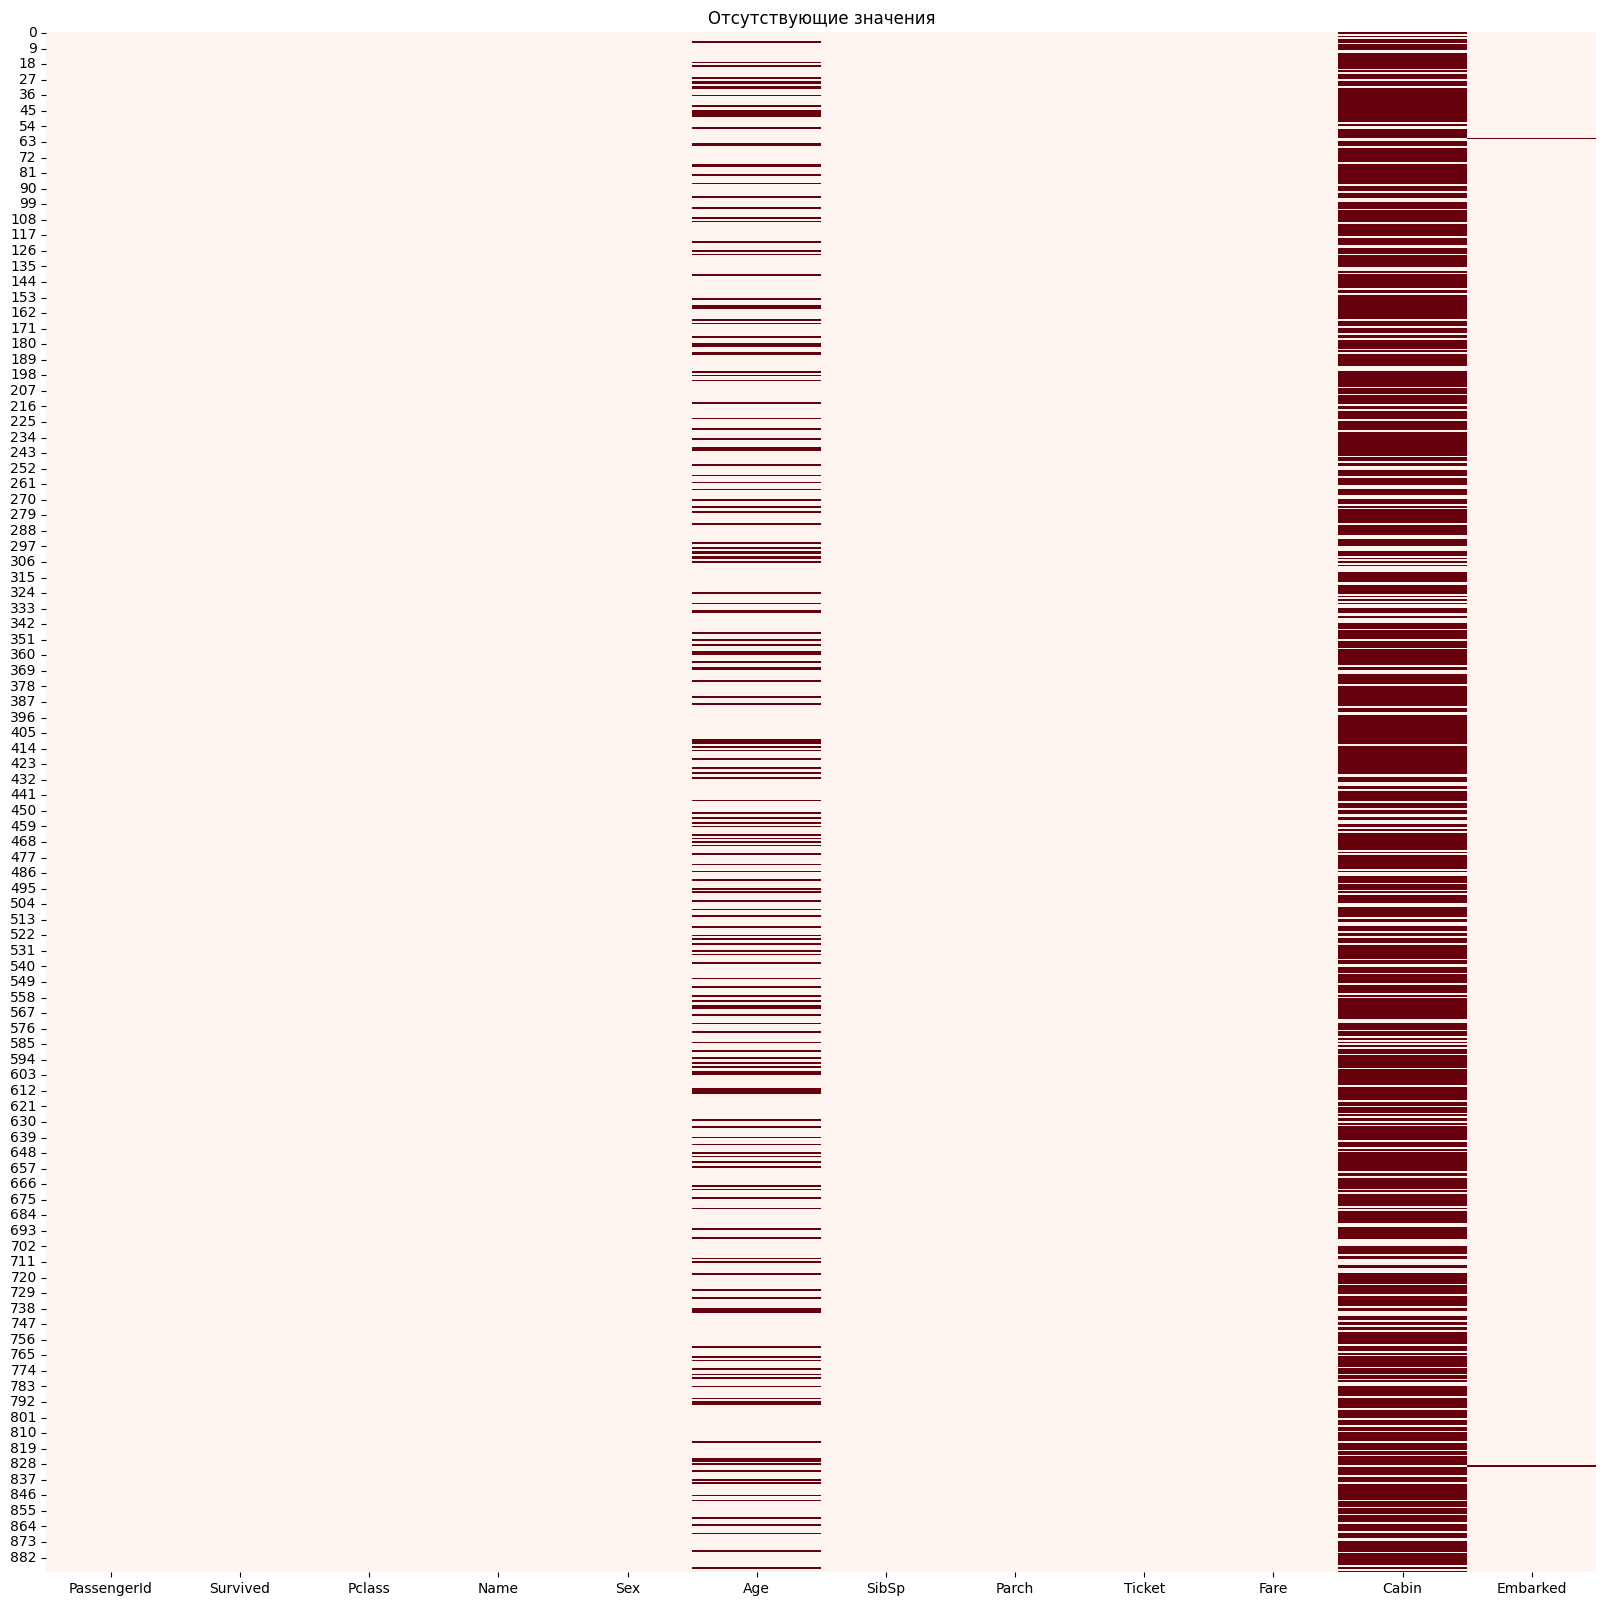

In [14]:
# Устанавливаем размер
plt.figure(figsize=(20, 20))
#Возвращение отстутсвующих значений( df.isnull() возвращает таблицу того же размера, где: True —  значение отсутствует (NaN);
#sns.heatmap(...) строит тепловую карту, где:True (NaN) — отображается как цвет ( оттенки красного из палитры 'Reds');
# cbar=False — отключает цветовую шкалу сбоку
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
# Добавляем заголовок к графику
plt.title("Отсутствующие значения")
# Отображаем график 
plt.show()

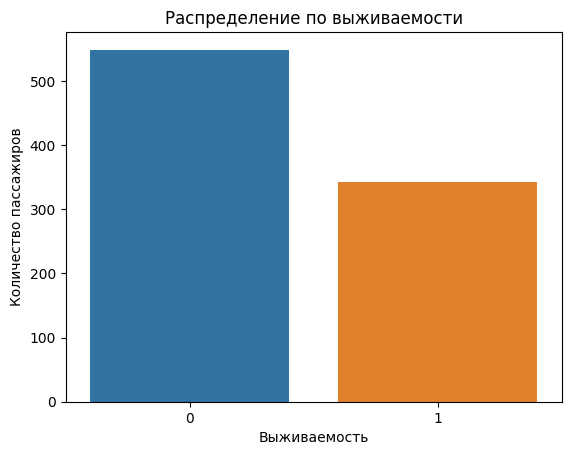

In [15]:
# Устанавливаем тип столбчатой диаграммы из библиотеки seaborn.
# x='Survived' — мы строим график по колонке Survived(0 — пассажир не выжил, 1 — пассажир выжил.)
sns.countplot(data=df, x='Survived')
# Добавляем заголовок к графику
plt.title("Распределение по выживаемости")
# Добавляем метку для оси X
plt.xlabel('Выживаемость')
# Добавляем метку для оси Y
plt.ylabel('Количество пассажиров')
# Отображаем график 
plt.show()